# Group Project part 02

#### Deadline for the code submission: October 14th at 01:29 pm CET

#### Reminder
- your group is the one assigned to you by the University.
- one goal of this project is to learn how to work as a group, which is the standard in the tech industry. Therefore you need to resolve group issues on your own, as a group.
- if you did not manage to resolve the group issues on your own, you need to escalate to the teacher early, not last minute.
- if the group splits, it would result in a 0 for the whole group.

**Penalty for unexcused absence or lateness**:
- If you are absent or late on presentation day without an official excuse, you will receive 0 for the presentation part of the group project.
- If you are late without an official excuse and can still make it to the presentation of your team, you will still receive 0 for the presentation part of the group project.

## Objective
In this project, you utilise your skills to :
- collect data through multiple APIs and open source datasets, for both quantitative and qualitative data
- merge data from different sources
- describe and analyse datasets
- uncover patterns, insights
- calculate aggregated measures, statistics
- create compelling data visualisations
- write clean code
- tell a story and convince your audience

Each group can pick one and one only scenario among the following ones.

Be mindful to pick a topic that enables enough data collection and analysis in order to showcase all the skills gathered during the course, listed above.

### Scenario 01: Become a Business Manager

Your task is to design a local business that leverages data from various APIs to make informed, strategic decisions. Whether you're launching a street food stand, a drink shop, or another local venture, your team will gather and analyze relevant data —such as foot traffic, weather patterns, customer trends, or competitor insights— to shape your business plan. Your final deliverable will be a data-supported report and/or presentation to a management board, demonstrating how your findings guide key decisions in operations, marketing, or product offerings. The ultimate goal: to optimize performance and increase the chances of business success. Will your business thrive in today’s data-driven world?
Examples:
- lemonade stands business
- food truck business
- delivery service

### Scenario 02: Fact Check Popular beliefs

You are part of a fact-checking research team investigating common beliefs, trending opinions, or viral social media claims (e.g. “drinking lemon water boosts metabolism” or “blue light ruins your sleep”). Your goal is to dig into reliable sources, data, and expert opinions to determine whether these beliefs hold up under scrutiny. Use data to challenge or prove real-world claims with clear, persuasive insights. Drawing on research, statistics, and visual evidence, your team will present a well-supported explanation to help your audience separate fact from fiction.

You may also choose to divide the group into two sides—one defending the belief and the other challenging it—before presenting your findings in a debate or side-by-side analysis.

Examples:
- Electric cars are always better for the environment
- Areas with more green space have better physical and mental health outcomes.
- Does public sentiment on social media predict stock market trends?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 04 - Data cleaning and processing

In order to make data-driven decisions, you will need to clean the collected data, fill missing values, merge datasets etc.

Take some time to clean and process the collected data so that you can use it.

Organize the dataset into a structured format, such as a CSV file, HTML file, EXCEL file, and a table where each row represents the achieved data.

In [ ]:
path = '/content/drive/MyDrive/Group_Project/data'

#Make pandas Dataframe out of the collected csv files

worldb_energy_df = pd.read_csv(f"{path}/worldb_energy.csv")
worldb_envfin_df = pd.read_csv(f"{path}/worldb_envfin.csv")
worldb_envghg_df = pd.read_csv(f"{path}/worldb_envghg.csv")
environment_imf_df = pd.read_csv(f"{path}/Environment_IMF.csv")
CPI_Global_Climate_Finance_df = pd.read_csv(f"{path}/CPI_Global_Climate_Finance_Data.csv")

In [ ]:
#Create id column for merging Worldbank Dataframes
worldb_energy_df['economy_Time'] = worldb_energy_df['economy'].astype(str) + '_' + worldb_energy_df['Time'].astype(str)

cols = ['economy_Time'] + [col for col in worldb_energy_df.columns if col != 'economy_Time']
worldb_energy_df = worldb_energy_df[cols]

worldb_energy_df.head()

worldb_envfin_df['economy_Time'] = worldb_envfin_df['economy'].astype(str) + '_' + worldb_envfin_df['Time'].astype(str)

cols = ['economy_Time'] + [col for col in worldb_envfin_df.columns if col != 'economy_Time']
worldb_envfin_df = worldb_envfin_df[cols]

worldb_envfin_df.head()

worldb_envghg_df['economy_Time'] = worldb_envghg_df['economy'].astype(str) + '_' + worldb_envghg_df['Time'].astype(str)

cols = ['economy_Time'] + [col for col in worldb_envghg_df.columns if col != 'economy_Time']
worldb_envghg_df = worldb_envghg_df[cols]

worldb_envghg_df.head()

,economy_Time,Unnamed: 0,economy,time,Country,Time,EN.CLC.DRSK.XQ,EN.CLC.MDAT.ZS,EN.GHG.ALL.LU.MT.CE.AR5,EN.GHG.ALL.MT.CE.AR5,...,EN.GHG.CO2.MT.CE.AR5,EN.GHG.CO2.PC.CE.AR5,EN.GHG.CO2.PI.MT.CE.AR5,EN.GHG.CO2.RT.GDP.KD,EN.GHG.CO2.RT.GDP.PP.KD,EN.GHG.CO2.TR.MT.CE.AR5,EN.GHG.CO2.WA.MT.CE.AR5,EN.GHG.CO2.ZG.AR5,EN.GHG.FGAS.IP.MT.CE.AR5,EN.GHG.TOT.ZG.AR5
0,ZMB_2011,0,ZMB,YR2011,Zambia,2011,3.75,NaN,-19.8048,18.7092,...,3.2873,0.227687,0.0349,0.188410,0.068259,1.3439,NaN,8.563408,0.0001,20.846413
1,YEM_2011,1,YEM,YR2011,"Yemen, Rep.",2011,2.25,NaN,45.4791,47.3661,...,23.0001,0.833854,5.2967,0.418006,NaN,6.6570,NaN,223.612342,2.1099,170.578390
2,VEN_2011,2,VEN,YR2011,"Venezuela, RB",2011,2.75,NaN,-41.5935,257.1569,...,172.9572,5.926193,26.3558,NaN,NaN,50.8393,0.0153,68.609273,4.0841,57.452190
3,VUT_2011,3,VUT,YR2011,Vanuatu,2011,2.00,NaN,-6.2252,0.7118,...,0.1796,0.737656,0.0407,0.255844,0.217536,0.1006,NaN,75.219512,NaN,50.677392
4,USA_2011,4,USA,YR2011,United States,2011,3.50,NaN,5507.7404,6509.5922,...,5307.9147,17.021305,2245.8501,0.319856,0.282532,1633.5907,0.0033,6.503141,187.8107,4.836258


In [ ]:
#Merge Worldbank Dataframes
worldb_df_merge_one = pd.merge(worldb_energy_df, worldb_envfin_df, on="economy_Time", how="left")
worldb_df_merged = pd.merge(worldb_df_merge_one, worldb_envghg_df, on="economy_Time", how="inner")

worldb_df_merged.shape

(5160, 75)

In [ ]:
#Drop duplicate columns from merge
worldb_df_final = worldb_df_merged.drop(columns=['Unnamed: 0_x','economy_x', 'time_x', 'Country_x', 'Time_x', 'economy_y', 'time_y', 'Country_y', 'Time_y', 'economy', 'time', 'Time'], axis=1)
worldb_df_final.shape

(5160, 63)

In [ ]:
#Make gather a list of the column names abbrevations
column_names = worldb_df_final.columns.tolist()
print(column_names)

['economy_Time', 'EG.EGY.PRIM.PP.KD', 'EG.ELC.ACCS.RU.ZS', 'EG.ELC.ACCS.UR.ZS', 'EG.ELC.ACCS.ZS', 'EG.ELC.COAL.ZS', 'EG.ELC.FOSL.ZS', 'EG.ELC.HYRO.ZS', 'EG.ELC.LOSS.ZS', 'EG.ELC.NGAS.ZS', 'EG.ELC.NUCL.ZS', 'EG.ELC.PETR.ZS', 'EG.ELC.RNEW.ZS', 'EG.ELC.RNWX.KH', 'EG.ELC.RNWX.ZS', 'EG.FEC.RNEW.ZS', 'EG.GDP.PUSE.KO.PP', 'EG.GDP.PUSE.KO.PP.KD', 'EG.IMP.CONS.ZS', 'EG.USE.COMM.CL.ZS', 'EG.USE.COMM.FO.ZS', 'EG.USE.COMM.GD.PP.KD', 'EG.USE.CRNW.ZS', 'EG.USE.ELEC.KH.PC', 'EG.USE.PCAP.KG.OE', 'Unnamed: 0_y', 'DT.NFL.UNEP.CD', 'NY.ADJ.DCO2.CD', 'NY.ADJ.DCO2.GN.ZS', 'NY.ADJ.DPEM.CD', 'NY.ADJ.DPEM.GN.ZS', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.CN', 'NY.GDP.MKTP.KD.ZG', 'SP.POP.TOTL', 'Unnamed: 0', 'Country', 'EN.CLC.DRSK.XQ', 'EN.CLC.MDAT.ZS', 'EN.GHG.ALL.LU.MT.CE.AR5', 'EN.GHG.ALL.MT.CE.AR5', 'EN.GHG.ALL.PC.CE.AR5', 'EN.GHG.CH4.AG.MT.CE.AR5', 'EN.GHG.CO2.AG.MT.CE.AR5', 'EN.GHG.CO2.BU.MT.CE.AR5', 'EN.GHG.CO2.FE.MT.CE.AR5', 'EN.GHG.CO2.IC.MT.CE.AR5', 'EN.GHG.CO2.IP.MT.CE.AR5', 'EN.GHG.CO2.LU.DF.MT.CE.AR5', 'EN

In [ ]:
#Change the abbrevations into English
worldb_df_final = worldb_df_final.rename(columns={
    'EG.EGY.PRIM.PP.KD': 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'EG.ELC.ACCS.RU.ZS': 'Access to electricity, rural (% of rural population)',
    'EG.ELC.ACCS.UR.ZS': 'Access to electricity, urban (% of urban population)',
    'EG.ELC.ACCS.ZS': 'Access to electricity (% of population)',
    'EG.ELC.COAL.ZS': 'Electricity production from coal sources (% of total)',
    'EG.ELC.FOSL.ZS': 'Electricity production from oil, gas and coal sources (% of total)',
    'EG.ELC.HYRO.ZS': 'Electricity production from hydroelectric sources (% of total)',
    'EG.ELC.LOSS.ZS': 'Electric power transmission and distribution losses (% of output)',
    'EG.ELC.NGAS.ZS': 'Electricity production from natural gas sources (% of total)',
    'EG.ELC.NUCL.ZS': 'Electricity production from nuclear sources (% of total)',
    'EG.ELC.PETR.ZS': 'Electricity production from oil sources (% of total)',
    'EG.ELC.RNEW.ZS': 'Renewable electricity output (% of total electricity output)',
    'EG.ELC.RNWX.KH': 'Electricity production from renewable sources, excluding hydroelectric (kWh)',
    'EG.ELC.RNWX.ZS': 'Electricity production from renewable sources, excluding hydroelectric (% of total)',
    'EG.FEC.RNEW.ZS': 'Renewable energy consumption (% of total final energy consumption)',
    'EG.GDP.PUSE.KO.PP': 'GDP per unit of energy use (PPP $ per kg of oil equivalent)',
    'EG.GDP.PUSE.KO.PP.KD': 'GDP per unit of energy use (constant 2021 PPP $ per kg of oil equivalent)',
    'EG.IMP.CONS.ZS': 'Energy imports, net (% of energy use)',
    'EG.USE.COMM.CL.ZS': 'Alternative and nuclear energy (% of total energy use)',
    'EG.USE.COMM.FO.ZS': 'Fossil fuel energy consumption (% of total)',
    'EG.USE.COMM.GD.PP.KD': 'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2021 PPP)',
    'EG.USE.CRNW.ZS': 'Combustible renewables and waste (% of total energy)',
    'EG.USE.ELEC.KH.PC': 'Electric power consumption (kWh per capita)',
    'EG.USE.PCAP.KG.OE': 'Energy use (kg of oil equivalent per capita)',
    'DT.NFL.UNEP.CD': 'Net official flows from UN agencies, UNEP (current US$)',
    'NY.ADJ.DCO2.CD': 'Adjusted savings: carbon dioxide damage (current US$)',
    'NY.ADJ.DCO2.GN.ZS': 'Adjusted savings: carbon dioxide damage (% of GNI)',
    'NY.ADJ.DPEM.CD': 'Adjusted savings: particulate emission damage (current US$)',
    'NY.ADJ.DPEM.GN.ZS': 'Adjusted savings: particulate emission damage (% of GNI)',
    'NY.GDP.MKTP.CD': 'GDP (current US$)',
    'NY.GDP.MKTP.CN': 'GDP (current LCU)',
    'NY.GDP.MKTP.KD.ZG': 'GDP growth (annual %)',
    'SP.POP.TOTL': 'Population, total',
    'EN.CLC.DRSK.XQ': 'Disaster risk reduction progress score (1-5 scale; 5=best)',
    'EN.CLC.MDAT.ZS': 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
    'EN.GHG.ALL.LU.MT.CE.AR5': 'Total greenhouse gas emissions including LULUCF (Mt CO2e)',
    'EN.GHG.ALL.MT.CE.AR5': 'Total greenhouse gas emissions excluding LULUCF (Mt CO2e)',
    'EN.GHG.ALL.PC.CE.AR5': 'Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)',
    'EN.GHG.CH4.AG.MT.CE.AR5': 'Methane (CH4) emissions from Agriculture (Mt CO2e)',
    'EN.GHG.CO2.AG.MT.CE.AR5': 'Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)',
    'EN.GHG.CO2.BU.MT.CE.AR5': 'Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)',
    'EN.GHG.CO2.FE.MT.CE.AR5': 'Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e)',
    'EN.GHG.CO2.IC.MT.CE.AR5': 'Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)',
    'EN.GHG.CO2.IP.MT.CE.AR5': 'Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e)',
    'EN.GHG.CO2.LU.DF.MT.CE.AR5': 'Carbon dioxide (CO2) net fluxes from LULUCF - Deforestation (Mt CO2e)',
    'EN.GHG.CO2.LU.FL.MT.CE.AR5': 'Carbon dioxide (CO2) net fluxes from LULUCF - Forest Land (Mt CO2e)',
    'EN.GHG.CO2.LU.MT.CE.AR5': 'Carbon dioxide (CO2) net fluxes from LULUCF - Total excluding non-tropical fires (Mt CO2e)',
    'EN.GHG.CO2.LU.OL.MT.CE.AR5': 'Carbon dioxide (CO2) net fluxes from LULUCF - Other Land (Mt CO2e)',
    'EN.GHG.CO2.LU.OS.MT.CE.AR5': 'Carbon dioxide (CO2) net fluxes from LULUCF - Organic Soil (Mt CO2e)',
    'EN.GHG.CO2.MT.CE.AR5': 'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)',
    'EN.GHG.CO2.PC.CE.AR5': 'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
    'EN.GHG.CO2.PI.MT.CE.AR5': 'Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e)',
    'EN.GHG.CO2.RT.GDP.KD': 'Carbon intensity of GDP (kg CO2e per constant 2015 US$ of GDP)',
    'EN.GHG.CO2.RT.GDP.PP.KD': 'Carbon intensity of GDP (kg CO2e per 2021 PPP $ of GDP)',
    'EN.GHG.CO2.TR.MT.CE.AR5': 'Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e)',
    'EN.GHG.CO2.WA.MT.CE.AR5': 'Carbon dioxide (CO2) emissions from Waste (Mt CO2e)',
    'EN.GHG.CO2.ZG.AR5': 'Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990)',
    'EN.GHG.FGAS.IP.MT.CE.AR5': 'F-gases emissions from Industrial Processes (Mt CO2e)',
    'EN.GHG.TOT.ZG.AR5': 'Total greenhouse gas emissions excluding LULUCF (% change from 1990)'
})

column_names = worldb_df_final.columns.tolist()
print(column_names)

['economy_Time', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Access to electricity, rural (% of rural population)', 'Access to electricity, urban (% of urban population)', 'Access to electricity (% of population)', 'Electricity production from coal sources (% of total)', 'Electricity production from oil, gas and coal sources (% of total)', 'Electricity production from hydroelectric sources (% of total)', 'Electric power transmission and distribution losses (% of output)', 'Electricity production from natural gas sources (% of total)', 'Electricity production from nuclear sources (% of total)', 'Electricity production from oil sources (% of total)', 'Renewable electricity output (% of total electricity output)', 'Electricity production from renewable sources, excluding hydroelectric (kWh)', 'Electricity production from renewable sources, excluding hydroelectric (% of total)', 'Renewable energy consumption (% of total final energy consumption)', 'GDP per unit of energ

In [ ]:
#See the result
worldb_df_final.head(50)

,economy_Time,Energy intensity level of primary energy (MJ/$2017 PPP GDP),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Access to electricity (% of population),Electricity production from coal sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Electricity production from hydroelectric sources (% of total),Electric power transmission and distribution losses (% of output),Electricity production from natural gas sources (% of total),...,Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e),Carbon intensity of GDP (kg CO2e per constant 2015 US$ of GDP),Carbon intensity of GDP (kg CO2e per 2021 PPP $ of GDP),Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e),Carbon dioxide (CO2) emissions from Waste (Mt CO2e),Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),F-gases emissions from Industrial Processes (Mt CO2e),Total greenhouse gas emissions excluding LULUCF (% change from 1990)
0,ZWE_2019,14.35,28.3,85.4,46.7,48.223229,48.223229,49.666110,18.387789,0.000000,...,11.1692,0.731382,4.9028,0.539034,0.221980,2.2368,NaN,-35.841275,0.4795,-17.405963
1,ZWE_2018,13.64,26.4,85.4,45.4,44.113566,44.113566,53.879816,20.706586,0.000000,...,12.2700,0.816126,5.3006,0.554661,0.228416,2.6232,NaN,-29.518000,0.4345,-12.927973
2,ZWE_2017,13.62,24.2,85.5,44.0,44.802013,45.437690,52.549331,22.910873,0.000000,...,10.5854,0.714627,5.0041,0.502482,0.206928,1.9961,NaN,-39.194770,0.3836,-18.811867
3,ZWE_2016,14.18,21.9,85.5,42.5,53.974607,56.776152,41.195142,22.426166,0.000000,...,11.2663,0.771649,5.9458,0.560124,0.230666,1.8381,NaN,-35.283508,0.3419,-17.297950
4,ZWE_2015,14.59,10.9,81.2,33.7,46.771702,47.296880,51.385027,17.032231,0.000000,...,12.6895,0.881276,6.7615,0.635649,0.261768,2.3409,NaN,-27.108285,0.2997,-12.060964
5,ZWE_2014,14.69,7.7,83.4,32.3,43.831655,44.400120,54.163758,16.445597,0.000000,...,12.5977,0.886702,6.7737,0.642282,0.264499,2.5505,NaN,-27.635607,0.2712,-15.211948
6,ZWE_2013,14.79,18.9,85.5,40.6,45.430809,46.088773,52.177546,17.785901,0.000000,...,12.7159,0.907384,6.7170,0.663719,0.273327,2.8374,NaN,-26.956637,0.2488,-8.787702
7,ZWE_2012,14.61,23.8,85.4,44.0,39.027039,39.645998,58.529699,19.252905,0.000000,...,12.7400,0.921993,5.5053,0.678206,0.279293,2.5546,NaN,-26.818200,0.2421,-9.386864
8,ZWE_2011,16.48,14.1,83.2,36.9,41.547619,42.294372,56.287879,17.705628,0.000000,...,15.8457,1.165517,8.8828,0.984116,0.405270,2.2545,NaN,-8.978269,0.2374,-0.988995
9,ZWE_2010,17.83,15.8,85.3,38.9,31.626194,32.178617,66.739556,19.749108,0.000000,...,10.0650,0.753563,4.2801,0.713824,0.293961,1.3179,NaN,-42.184080,0.2358,-19.985443


In [ ]:
#See the results
environment_imf_df.head(50)


,ObjectId,Country,ISO2,ISO3,Indicator,Source,CTS Code,CTS Name,CTS Full Descriptor,Unit,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,Albania,AL,ALB,Environmental Taxes,Organisation for Economic Co-operation and Dev...,ECGTE,Environmental Taxes,"Environment, Climate Change, Government Policy...",Domestic Currency,...,NaN,NaN,NaN,4.399314e+10,4.781379e+10,4.754858e+10,5.114559e+10,5.341565e+10,NaN,NaN
1,2,Albania,AL,ALB,Environmental Taxes,Organisation for Economic Co-operation and Dev...,ECGTE,Environmental Taxes,"Environment, Climate Change, Government Policy...",Percent of GDP,...,NaN,NaN,NaN,3.067206e+00,3.247163e+00,3.066373e+00,3.124865e+00,3.157133e+00,NaN,NaN
2,3,Albania,AL,ALB,Taxes on Energy (including fuel for transport),Organisation for Economic Co-operation and Dev...,ECGTEN,Taxes on Energy (Including Fuel for Transport),"Environment, Climate Change, Government Policy...",Domestic Currency,...,NaN,NaN,NaN,3.774111e+10,4.094562e+10,4.040004e+10,4.352182e+10,4.516530e+10,NaN,NaN
3,4,Albania,AL,ALB,Taxes on Energy (including fuel for transport),Organisation for Economic Co-operation and Dev...,ECGTEN,Taxes on Energy (Including Fuel for Transport),"Environment, Climate Change, Government Policy...",Percent of GDP,...,NaN,NaN,NaN,2.631314e+00,2.780726e+00,2.605369e+00,2.659072e+00,2.669496e+00,NaN,NaN
4,5,Albania,AL,ALB,Taxes on Pollution,Organisation for Economic Co-operation and Dev...,ECGTEP,Taxes on Pollution,"Environment, Climate Change, Government Policy...",Domestic Currency,...,NaN,NaN,NaN,1.782069e+09,1.879970e+09,1.941324e+09,2.226251e+09,2.625011e+09,NaN,NaN
5,6,Albania,AL,ALB,Taxes on Pollution,Organisation for Economic Co-operation and Dev...,ECGTEP,Taxes on Pollution,"Environment, Climate Change, Government Policy...",Percent of GDP,...,NaN,NaN,NaN,1.242460e-01,1.276738e-01,1.251946e-01,1.360183e-01,1.551514e-01,NaN,NaN
6,7,Albania,AL,ALB,Taxes on Resources,Organisation for Economic Co-operation and Dev...,ECGTER,Taxes on Resources,"Environment, Climate Change, Government Policy...",Domestic Currency,...,NaN,NaN,NaN,3.254649e+07,5.252434e+07,6.186136e+07,5.601199e+07,5.877710e+07,NaN,NaN
7,8,Albania,AL,ALB,Taxes on Resources,Organisation for Economic Co-operation and Dev...,ECGTER,Taxes on Resources,"Environment, Climate Change, Government Policy...",Percent of GDP,...,NaN,NaN,NaN,2.269145e-03,3.567068e-03,3.989394e-03,3.422190e-03,3.474022e-03,NaN,NaN
8,9,Albania,AL,ALB,Taxes on Transport (excluding fuel for transport),Organisation for Economic Co-operation and Dev...,ECGTET,Taxes on Transport (Excluding Fuel for Transport),"Environment, Climate Change, Government Policy...",Domestic Currency,...,NaN,NaN,NaN,4.437413e+09,4.935684e+09,5.145347e+09,5.341506e+09,5.566564e+09,NaN,NaN
9,10,Albania,AL,ALB,Taxes on Transport (excluding fuel for transport),Organisation for Economic Co-operation and Dev...,ECGTET,Taxes on Transport (Excluding Fuel for Transport),"Environment, Climate Change, Government Policy...",Percent of GDP,...,NaN,NaN,NaN,3.093769e-01,3.351955e-01,3.318197e-01,3.263524e-01,3.290119e-01,NaN,NaN


In [ ]:
#Print the column names to see which ones to drop
column_names_imf = environment_imf_df.columns.tolist()
print(column_names_imf)

['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Source', 'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Unit', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [ ]:
#Drop the unnecessary columns and check for null values
environment_imf_df = environment_imf_df.drop(['ObjectId', 'ISO2', 'CTS Code', 'CTS Name', 'CTS Full Descriptor', 'Source','1995', '1996', '1997', '1998', '1999','2020', '2021'], axis=1)
environment_imf_df.head(50)
environment_imf_df.isna().sum()

,0
Country,0
ISO3,8
Indicator,0
Unit,0
2000,431
2001,415
2002,411
2003,403
2004,403
2005,369


In [ ]:
#See the shape of the dataframe as a reference for later
environment_imf_df.shape

(1239, 24)

In [ ]:
#Pivot the columns displaying years to a column displaying the year and pivot the indicator column the other way around
melted_df = pd.melt(
    environment_imf_df,
    id_vars=['Country', 'ISO3', 'Indicator',
            'Unit'],
    var_name='Year',
    value_name='Value'
)

melted_df['Year'] = melted_df['Year'].astype(int)

pivoted_df = melted_df.pivot_table(
    index=['Country', 'ISO3',
          'Unit', 'Year'],
    columns='Indicator',
    values='Value'
).reset_index()

pivoted_df.head(50)


Indicator,Country,ISO3,Unit,Year,Environmental Taxes,Taxes on Energy (including fuel for transport),Taxes on Pollution,Taxes on Resources,Taxes on Transport (excluding fuel for transport)
0,Albania,ALB,Domestic Currency,2015,4.399314e+10,3.774111e+10,1.782069e+09,3.254649e+07,4.437413e+09
1,Albania,ALB,Domestic Currency,2016,4.781379e+10,4.094562e+10,1.879970e+09,5.252434e+07,4.935684e+09
2,Albania,ALB,Domestic Currency,2017,4.754858e+10,4.040004e+10,1.941324e+09,6.186136e+07,5.145347e+09
3,Albania,ALB,Domestic Currency,2018,5.114559e+10,4.352182e+10,2.226251e+09,5.601199e+07,5.341506e+09
4,Albania,ALB,Domestic Currency,2019,5.341565e+10,4.516530e+10,2.625011e+09,5.877710e+07,5.566564e+09
5,Albania,ALB,Percent of GDP,2015,3.067206e+00,2.631314e+00,1.242460e-01,2.269145e-03,3.093769e-01
6,Albania,ALB,Percent of GDP,2016,3.247163e+00,2.780726e+00,1.276738e-01,3.567068e-03,3.351955e-01
7,Albania,ALB,Percent of GDP,2017,3.066373e+00,2.605369e+00,1.251946e-01,3.989394e-03,3.318197e-01
8,Albania,ALB,Percent of GDP,2018,3.124865e+00,2.659072e+00,1.360183e-01,3.422190e-03,3.263524e-01
9,Albania,ALB,Percent of GDP,2019,3.157133e+00,2.669496e+00,1.551514e-01,3.474022e-03,3.290119e-01


In [ ]:
#Create a seperate dataframe for the data displayed in its domestic currency
environment_imf_domcur = pivoted_df[pivoted_df['Unit'] == 'Domestic Currency']
environment_imf_domcur.drop('Unit', axis=1, inplace=True)
environment_imf_domcur.head(50)

/tmp/ipython-input-2312326532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  environment_imf_domcur.drop('Unit', axis=1, inplace=True)


Indicator,Country,ISO3,Year,Environmental Taxes,Taxes on Energy (including fuel for transport),Taxes on Pollution,Taxes on Resources,Taxes on Transport (excluding fuel for transport)
0,Albania,ALB,2015,4.399314e+10,3.774111e+10,1.782069e+09,32546493.00,4.437413e+09
1,Albania,ALB,2016,4.781379e+10,4.094562e+10,1.879970e+09,52524339.00,4.935684e+09
2,Albania,ALB,2017,4.754858e+10,4.040004e+10,1.941324e+09,61861356.38,5.145347e+09
3,Albania,ALB,2018,5.114559e+10,4.352182e+10,2.226251e+09,56011991.00,5.341506e+09
4,Albania,ALB,2019,5.341565e+10,4.516530e+10,2.625011e+09,58777099.50,5.566564e+09
10,"Andorra, Principality of",AND,2015,4.600367e+12,0.000000e+00,0.000000e+00,0.00,4.600367e+12
11,"Andorra, Principality of",AND,2016,4.616889e+12,0.000000e+00,0.000000e+00,0.00,4.616889e+12
12,"Andorra, Principality of",AND,2017,5.043869e+12,0.000000e+00,0.000000e+00,0.00,5.043869e+12
13,"Andorra, Principality of",AND,2018,5.283535e+12,0.000000e+00,0.000000e+00,0.00,5.283535e+12
14,"Andorra, Principality of",AND,2019,5.675649e+12,0.000000e+00,0.000000e+00,0.00,5.675649e+12


In [ ]:
#Check for null values
environment_imf_domcur.isna().sum()

,0
Indicator,
Country,0
ISO3,0
Year,0
Environmental Taxes,252
Taxes on Energy (including fuel for transport),193
Taxes on Pollution,92
Taxes on Resources,85
Taxes on Transport (excluding fuel for transport),181


In [ ]:
#Drop all rows that have null values and show the shape as a reference to the original
environment_imf_domcur = environment_imf_domcur.dropna(how='any')
environment_imf_domcur.shape

(1714, 8)

In [ ]:
#Create a seperate dataframe for the data displayed in as a percentage of the GDP
environment_imf_gdp = pivoted_df[pivoted_df['Unit'] == 'Percent of GDP']
environment_imf_gdp = environment_imf_gdp.drop('Unit', axis=1)
#add a suffix to the column names
cols_to_rename = ['Environmental Taxes', 'Taxes on Energy (including fuel for transport)', 'Taxes on Pollution', 'Taxes on Resources', 'Taxes on Transport (excluding fuel for transport)']
environment_imf_gdp.columns = [str(col) + ' (Percent of GDP)' if col in cols_to_rename else col for col in environment_imf_gdp.columns]

environment_imf_gdp.head(50)

,Country,ISO3,Year,Environmental Taxes (Percent of GDP),Taxes on Energy (including fuel for transport) (Percent of GDP),Taxes on Pollution (Percent of GDP),Taxes on Resources (Percent of GDP),Taxes on Transport (excluding fuel for transport) (Percent of GDP)
5,Albania,ALB,2015,3.067206,2.631314,0.124246,0.002269,0.309377
6,Albania,ALB,2016,3.247163,2.780726,0.127674,0.003567,0.335195
7,Albania,ALB,2017,3.066373,2.605369,0.125195,0.003989,0.331820
8,Albania,ALB,2018,3.124865,2.659072,0.136018,0.003422,0.326352
9,Albania,ALB,2019,3.157133,2.669496,0.155151,0.003474,0.329012
35,Antigua and Barbuda,ATG,2000,0.870000,0.000000,0.000000,0.000000,0.870000
36,Antigua and Barbuda,ATG,2001,0.890000,0.000000,0.000000,0.000000,0.890000
37,Antigua and Barbuda,ATG,2002,0.880000,0.000000,0.000000,0.000000,0.880000
38,Antigua and Barbuda,ATG,2003,0.820000,0.000000,0.000000,0.000000,0.820000
39,Antigua and Barbuda,ATG,2004,0.810000,0.000000,0.000000,0.000000,0.810000


In [ ]:
#Check for null values
environment_imf_gdp.isna().sum()

,0
Country,0
ISO3,0
Year,0
Environmental Taxes (Percent of GDP),262
Taxes on Energy (including fuel for transport) (Percent of GDP),193
Taxes on Pollution (Percent of GDP),92
Taxes on Resources (Percent of GDP),85
Taxes on Transport (excluding fuel for transport) (Percent of GDP),191


In [ ]:
#Drop any rows with null values and show the shape as a reference
environment_imf_gdp = environment_imf_gdp.dropna(how='any')
environment_imf_gdp.shape

(1699, 8)

In [ ]:
#Check for the null values
environment_imf_gdp.isna().sum()

,0
Country,0
ISO3,0
Year,0
Environmental Taxes (Percent of GDP),0
Taxes on Energy (including fuel for transport) (Percent of GDP),0
Taxes on Pollution (Percent of GDP),0
Taxes on Resources (Percent of GDP),0
Taxes on Transport (excluding fuel for transport) (Percent of GDP),0


In [ ]:
#Check for null values in the Worldbank dataframe
worldb_df_final.isna().sum()

,0
economy_Time,0
Energy intensity level of primary energy (MJ/$2017 PPP GDP),280
"Access to electricity, rural (% of rural population)",283
"Access to electricity, urban (% of urban population)",87
Access to electricity (% of population),65
...,...
Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e),320
Carbon dioxide (CO2) emissions from Waste (Mt CO2e),2240
Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),240
F-gases emissions from Industrial Processes (Mt CO2e),1120


In [ ]:
#Drop all unnecessary columns and columns with a lot of null values
worldb_df_final = worldb_df_final.drop([
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
    'Access to electricity, rural (% of rural population)',
    'Access to electricity, urban (% of urban population)',
    'Access to electricity (% of population)',
    'Electric power transmission and distribution losses (% of output)',
    'GDP per unit of energy use (PPP $ per kg of oil equivalent)',
    'GDP per unit of energy use (constant 2021 PPP $ per kg of oil equivalent)',
    'Energy imports, net (% of energy use)',
    'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2021 PPP)',
    'Combustible renewables and waste (% of total energy)',
    'Electric power consumption (kWh per capita)',
    'Energy use (kg of oil equivalent per capita)',
    'Methane (CH4) emissions from Agriculture (Mt CO2e)',
    'Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)',
    'Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)',
    'Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e)',
    'Carbon dioxide (CO2) emissions from Industrial Combustion (Energy) (Mt CO2e)',
    'Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e)',
    'Carbon dioxide (CO2) net fluxes from LULUCF - Deforestation (Mt CO2e)',
    'Carbon dioxide (CO2) net fluxes from LULUCF - Forest Land (Mt CO2e)',
    'Carbon dioxide (CO2) net fluxes from LULUCF - Total excluding non-tropical fires (Mt CO2e)',
    'Carbon dioxide (CO2) net fluxes from LULUCF - Other Land (Mt CO2e)',
    'Carbon dioxide (CO2) net fluxes from LULUCF - Organic Soil (Mt CO2e)',
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
    'Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e)',
    'Carbon intensity of GDP (kg CO2e per 2021 PPP $ of GDP)',
    'Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e)',
    'Carbon dioxide (CO2) emissions from Waste (Mt CO2e)',
    'F-gases emissions from Industrial Processes (Mt CO2e)',
    'Net official flows from UN agencies, UNEP (current US$)',
    'Disaster risk reduction progress score (1-5 scale; 5=best)',
    'Droughts, floods, extreme temperatures (% of population, average 1990-2009)',
    'Unnamed: 0',
    'Unnamed: 0_y',
    'Alternative and nuclear energy (% of total energy use)',
    'Fossil fuel energy consumption (% of total)'
], axis=1)

In [ ]:
#Check for null values afterwards
worldb_df_final.isna().sum()

,0
economy_Time,0
Electricity production from coal sources (% of total),143
"Electricity production from oil, gas and coal sources (% of total)",172
Electricity production from hydroelectric sources (% of total),163
Electricity production from natural gas sources (% of total),142
Electricity production from nuclear sources (% of total),144
Electricity production from oil sources (% of total),139
Renewable electricity output (% of total electricity output),249
"Electricity production from renewable sources, excluding hydroelectric (kWh)",124
"Electricity production from renewable sources, excluding hydroelectric (% of total)",143


In [ ]:
#Drop any rows with missing values
worldb_df_final = worldb_df_final.dropna(how='any')

In [ ]:
#Show the shape as a reference
worldb_df_final.shape

(3076, 27)

In [ ]:
#Display the top rows as a check
worldb_df_final.head(50)

,economy_Time,Electricity production from coal sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),Electricity production from oil sources (% of total),Renewable electricity output (% of total electricity output),"Electricity production from renewable sources, excluding hydroelectric (kWh)","Electricity production from renewable sources, excluding hydroelectric (% of total)",...,GDP growth (annual %),"Population, total",Country,Total greenhouse gas emissions including LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon intensity of GDP (kg CO2e per constant 2015 US$ of GDP),Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),Total greenhouse gas emissions excluding LULUCF (% change from 1990)
0,ZWE_2019,48.223229,48.223229,49.666110,0.000000,0.0,0.000000,68.845218,1.608360e+09,19.179108,...,-6.332450,15271368.0,Zimbabwe,43.6136,28.3694,1.857686,11.1692,0.539034,-35.841275,-17.405963
1,ZWE_2018,44.113566,44.113566,53.879816,0.000000,0.0,0.000000,63.033301,8.575900e+08,9.153485,...,5.009921,15034452.0,Zimbabwe,45.1517,29.9075,1.989264,12.2700,0.554661,-29.518000,-12.927973
2,ZWE_2017,44.802013,45.437690,52.549331,0.000000,0.0,0.635677,55.181433,1.987500e+08,2.632102,...,4.734411,14812482.0,Zimbabwe,43.1307,27.8865,1.882635,10.5854,0.502482,-39.194770,-18.811867
3,ZWE_2016,53.974607,56.776152,41.195142,0.000000,0.0,2.801546,41.448109,1.833000e+07,0.252967,...,0.755794,14600294.0,Zimbabwe,43.6507,28.4065,1.945612,11.2663,0.560124,-35.283508,-17.297950
4,ZWE_2015,46.771702,47.296880,51.385027,0.000000,0.0,0.525178,54.024920,2.563600e+08,2.639893,...,1.779854,14399013.0,Zimbabwe,45.4495,30.2053,2.097734,12.6895,0.635649,-27.108285,-12.060964
5,ZWE_2014,43.831655,44.400120,54.163758,0.000000,0.0,0.568465,56.768924,2.612200e+08,2.605166,...,2.376986,14207359.0,Zimbabwe,44.3672,29.1230,2.049853,12.5977,0.642282,-27.635607,-15.211948
6,ZWE_2013,45.430809,46.088773,52.177546,0.000000,0.0,0.657963,54.808460,2.519100e+08,2.630914,...,1.989486,14013808.0,Zimbabwe,46.5738,31.3296,2.235624,12.7159,0.663719,-26.956637,-8.787702
7,ZWE_2012,39.027039,39.645998,58.529699,0.000000,0.0,0.618960,61.248561,2.503800e+08,2.718862,...,16.665429,13817887.0,Zimbabwe,46.3680,31.1238,2.252428,12.7400,0.678206,-26.818200,-9.386864
8,ZWE_2011,41.547619,42.294372,56.287879,0.000000,0.0,0.746753,57.061364,7.147000e+07,0.773485,...,14.193916,13595424.0,Zimbabwe,49.2525,34.0083,2.501452,15.8457,0.984116,-8.978269,-0.988995
9,ZWE_2010,31.626194,32.178617,66.739556,0.000000,0.0,0.552423,67.446542,6.143000e+07,0.706986,...,19.675408,13356548.0,Zimbabwe,42.7276,27.4834,2.057672,10.0650,0.713824,-42.184080,-19.985443


In [ ]:
#No null values are shown
worldb_df_final.isna().sum()

,0
economy_Time,0
Electricity production from coal sources (% of total),0
"Electricity production from oil, gas and coal sources (% of total)",0
Electricity production from hydroelectric sources (% of total),0
Electricity production from natural gas sources (% of total),0
Electricity production from nuclear sources (% of total),0
Electricity production from oil sources (% of total),0
Renewable electricity output (% of total electricity output),0
"Electricity production from renewable sources, excluding hydroelectric (kWh)",0
"Electricity production from renewable sources, excluding hydroelectric (% of total)",0


In [ ]:
#Create a new column called year out of the id column to make filtering easier
worldb_df_final['Year'] = worldb_df_final['economy_Time'].str[-4:].astype(int)


cols = worldb_df_final.columns.tolist()
cols.remove('economy_Time')
cols.remove('Country')
cols.remove('Year')

#Reorder the columns
cols.insert(0, 'economy_Time')
cols.insert(1, 'Country')
cols.insert(2, 'Year')

worldb_df_final = worldb_df_final[cols]

display(worldb_df_final.head())

,economy_Time,Country,Year,Electricity production from coal sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),Electricity production from oil sources (% of total),Renewable electricity output (% of total electricity output),...,GDP (current LCU),GDP growth (annual %),"Population, total",Total greenhouse gas emissions including LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon intensity of GDP (kg CO2e per constant 2015 US$ of GDP),Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),Total greenhouse gas emissions excluding LULUCF (% change from 1990)
0,ZWE_2019,Zimbabwe,2019,48.223229,48.223229,49.666110,0.0,0.0,0.000000,68.845218,...,84913100.0,-6.332450,15271368.0,43.6136,28.3694,1.857686,11.1692,0.539034,-35.841275,-17.405963
1,ZWE_2018,Zimbabwe,2018,44.113566,44.113566,53.879816,0.0,0.0,0.000000,63.033301,...,27859600.0,5.009921,15034452.0,45.1517,29.9075,1.989264,12.2700,0.554661,-29.518000,-12.927973
2,ZWE_2017,Zimbabwe,2017,44.802013,45.437690,52.549331,0.0,0.0,0.635677,55.181433,...,25619900.0,4.734411,14812482.0,43.1307,27.8865,1.882635,10.5854,0.502482,-39.194770,-18.811867
3,ZWE_2016,Zimbabwe,2016,53.974607,56.776152,41.195142,0.0,0.0,2.801546,41.448109,...,8223700.0,0.755794,14600294.0,43.6507,28.4065,1.945612,11.2663,0.560124,-35.283508,-17.297950
4,ZWE_2015,Zimbabwe,2015,46.771702,47.296880,51.385027,0.0,0.0,0.525178,54.024920,...,7989300.0,1.779854,14399013.0,45.4495,30.2053,2.097734,12.6895,0.635649,-27.108285,-12.060964


In [ ]:
#Show the result
worldb_df_final.head(15)

,economy_Time,Country,Year,Electricity production from coal sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),Electricity production from oil sources (% of total),Renewable electricity output (% of total electricity output),...,GDP (current LCU),GDP growth (annual %),"Population, total",Total greenhouse gas emissions including LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon intensity of GDP (kg CO2e per constant 2015 US$ of GDP),Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),Total greenhouse gas emissions excluding LULUCF (% change from 1990)
0,ZWE_2019,Zimbabwe,2019,48.223229,48.223229,49.666110,0.0,0.0,0.000000,68.845218,...,8.491310e+07,-6.332450,15271368.0,43.6136,28.3694,1.857686,11.1692,0.539034,-35.841275,-17.405963
1,ZWE_2018,Zimbabwe,2018,44.113566,44.113566,53.879816,0.0,0.0,0.000000,63.033301,...,2.785960e+07,5.009921,15034452.0,45.1517,29.9075,1.989264,12.2700,0.554661,-29.518000,-12.927973
2,ZWE_2017,Zimbabwe,2017,44.802013,45.437690,52.549331,0.0,0.0,0.635677,55.181433,...,2.561990e+07,4.734411,14812482.0,43.1307,27.8865,1.882635,10.5854,0.502482,-39.194770,-18.811867
3,ZWE_2016,Zimbabwe,2016,53.974607,56.776152,41.195142,0.0,0.0,2.801546,41.448109,...,8.223700e+06,0.755794,14600294.0,43.6507,28.4065,1.945612,11.2663,0.560124,-35.283508,-17.297950
4,ZWE_2015,Zimbabwe,2015,46.771702,47.296880,51.385027,0.0,0.0,0.525178,54.024920,...,7.989300e+06,1.779854,14399013.0,45.4495,30.2053,2.097734,12.6895,0.635649,-27.108285,-12.060964
5,ZWE_2014,Zimbabwe,2014,43.831655,44.400120,54.163758,0.0,0.0,0.568465,56.768924,...,7.802200e+06,2.376986,14207359.0,44.3672,29.1230,2.049853,12.5977,0.642282,-27.635607,-15.211948
6,ZWE_2013,Zimbabwe,2013,45.430809,46.088773,52.177546,0.0,0.0,0.657963,54.808460,...,7.640300e+06,1.989486,14013808.0,46.5738,31.3296,2.235624,12.7159,0.663719,-26.956637,-8.787702
7,ZWE_2012,Zimbabwe,2012,39.027039,39.645998,58.529699,0.0,0.0,0.618960,61.248561,...,6.849400e+06,16.665429,13817887.0,46.3680,31.1238,2.252428,12.7400,0.678206,-26.818200,-9.386864
8,ZWE_2011,Zimbabwe,2011,41.547619,42.294372,56.287879,0.0,0.0,0.746753,57.061364,...,5.643600e+06,14.193916,13595424.0,49.2525,34.0083,2.501452,15.8457,0.984116,-8.978269,-0.988995
9,ZWE_2010,Zimbabwe,2010,31.626194,32.178617,66.739556,0.0,0.0,0.552423,67.446542,...,4.819100e+06,19.675408,13356548.0,42.7276,27.4834,2.057672,10.0650,0.713824,-42.184080,-19.985443


In [ ]:
CPI_Global_Climate_Finance_df.head(50)

,Development_Status_Origin,Region_Destination,SIDs_Destination,Development_Status_Destination,Institution_Type_Layer1,Institution_Type_Layer2,Domestic_International,Instrument,Use,Sector,Sub_Sector,Year,Value
0,Advanced,Central Asia & Eastern Europe,False,Advanced,Private,Commercial FIs,Domestic,Balance sheet financing (debt portion),Mitigation,Energy systems,Power & Heat Generation,2023,6.380057e-01
1,Advanced,Central Asia & Eastern Europe,False,Advanced,Private,Commercial FIs,Domestic,Project-level market rate debt,Mitigation,Energy systems,Power & Heat Generation,2023,9.737784e-02
2,Advanced,Central Asia & Eastern Europe,False,Advanced,Private,Commercial FIs,Domestic,Project-level market rate debt,Mitigation,Waste,Other/Unspecified,2023,8.647722e-03
3,Advanced,Central Asia & Eastern Europe,False,Advanced,Private,Commercial FIs,Domestic,Project-level market rate debt,Dual benefit,"Agriculture, Forestry, Other land uses and Fis...",Forestry,2023,5.615400e-04
4,Advanced,Central Asia & Eastern Europe,False,Advanced,Private,Commercial FIs,Domestic,Project-level market rate debt,Dual benefit,Water & wastewater,Other/Unspecified,2023,3.369240e-04
5,Advanced,Central Asia & Eastern Europe,False,Advanced,Private,Commercial FIs,International,Project-level market rate debt,Mitigation,"Agriculture, Forestry, Other land uses and Fis...",Forestry,2023,3.927564e-03
6,Advanced,Central Asia & Eastern Europe,False,Advanced,Private,Commercial FIs,International,Project-level market rate debt,Mitigation,"Agriculture, Forestry, Other land uses and Fis...",Unspecified / Multiple,2023,2.814601e-02
7,Advanced,Central Asia & Eastern Europe,False,Advanced,Private,Commercial FIs,International,Project-level market rate debt,Mitigation,Energy systems,Power & Heat Generation,2023,3.513565e-01
8,Advanced,Central Asia & Eastern Europe,False,Advanced,Private,Commercial FIs,International,Project-level market rate debt,Mitigation,Waste,Other/Unspecified,2023,1.243234e-02
9,Advanced,Central Asia & Eastern Europe,False,Advanced,Private,Commercial FIs,International,Project-level market rate debt,Dual benefit,"Agriculture, Forestry, Other land uses and Fis...",Forestry,2023,3.800714e-02


In [ ]:
#Make sure that there are no sneaky 'Unknown' values which are not shown in the null value test
CPI_Global_Climate_Finance_df  = CPI_Global_Climate_Finance_df .fillna(np.nan)
CPI_Global_Climate_Finance_df = CPI_Global_Climate_Finance_df.astype(str)
problem_values = ['Unknown']
CPI_Global_Climate_Finance_df = CPI_Global_Climate_Finance_df.replace(problem_values, np.nan)
CPI_Global_Climate_Finance_df['Value']  = CPI_Global_Climate_Finance_df['Value'].astype(float)
CPI_Global_Climate_Finance_df['SIDs_Destination'] = CPI_Global_Climate_Finance_df['SIDs_Destination'].astype(bool)

In [ ]:
#Drop any rows with null values
CPI_Global_Climate_Finance_df = CPI_Global_Climate_Finance_df.dropna(how='any')

In [ ]:
#Check for null values
CPI_Global_Climate_Finance_df.isna().sum()

,0
Development_Status_Origin,0
Region_Destination,0
SIDs_Destination,0
Development_Status_Destination,0
Institution_Type_Layer1,0
Institution_Type_Layer2,0
Domestic_International,0
Instrument,0
Use,0
Sector,0


In [ ]:
#As a reference check the shape
CPI_Global_Climate_Finance_df.shape

(11880, 13)

## 05 - Compute relevant statistics

Get together as a group and ask yourselves: what questions would you like to answer?

Compute descriptive statistics that inform you about the future and enable you to answer these questions.

Reminder: this should help you to achieve your end goal.


What was the situation in the year 2000, as many big corporates use this year as the base year for their climate ambitions?

In [ ]:
worldb_df_final[worldb_df_final['Year'] == 2000].describe()

,Year,Electricity production from coal sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),Electricity production from oil sources (% of total),Renewable electricity output (% of total electricity output),"Electricity production from renewable sources, excluding hydroelectric (kWh)","Electricity production from renewable sources, excluding hydroelectric (% of total)",...,GDP (current LCU),GDP growth (annual %),"Population, total",Total greenhouse gas emissions including LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon intensity of GDP (kg CO2e per constant 2015 US$ of GDP),Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),Total greenhouse gas emissions excluding LULUCF (% change from 1990)
count,151.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,1.510000e+02,151.000000,...,1.510000e+02,151.000000,1.510000e+02,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,2000.0,14.242474,60.957606,31.877323,16.977215,5.453869,29.737917,33.702753,1.435037e+09,1.825430,...,2.768882e+13,4.380261,3.765065e+07,195.730477,217.017472,6.923831,153.157415,0.638086,67.316625,59.920162
std,0.0,25.318615,35.090686,34.442124,27.275256,14.345423,36.314970,34.477718,6.711107e+09,8.377573,...,1.452642e+14,4.481190,1.373891e+08,670.784503,767.472670,8.231684,597.680378,0.726055,311.674138,520.146346
min,2000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.655690e+09,-71.056856,...,2.677349e+06,-14.277000,1.026770e+05,-242.993800,0.092700,0.450466,0.041600,0.053839,-84.887382,-75.558151
25%,2000.0,0.000000,31.369647,1.786507,0.000000,0.000000,0.946103,3.073581,0.000000e+00,0.000000,...,2.347570e+10,2.505436,2.926392e+06,4.078300,10.031950,1.813327,2.764550,0.254602,1.433079,-1.375397
50%,2000.0,0.000000,65.971797,16.109396,1.558223,0.000000,10.058449,18.940810,1.330000e+07,0.200748,...,2.779368e+11,4.200000,8.170172e+06,28.533500,27.902200,4.138545,11.464800,0.398519,36.960089,21.168015
75%,2000.0,19.502418,95.542957,58.251681,19.490355,0.000000,50.409678,59.532532,5.914550e+08,2.370821,...,2.118910e+12,5.878857,2.104003e+07,104.976600,91.452900,9.363793,59.389400,0.737299,69.248200,38.597316
max,2000.0,97.631579,100.000000,100.000000,100.000000,76.888402,100.000000,100.000000,7.716000e+10,28.120913,...,1.389770e+15,28.615934,1.262645e+09,6156.565200,7203.334400,58.951006,5928.971000,5.155224,3760.196906,6392.270270


What are the top emitting countries over time according to the Worldbank?

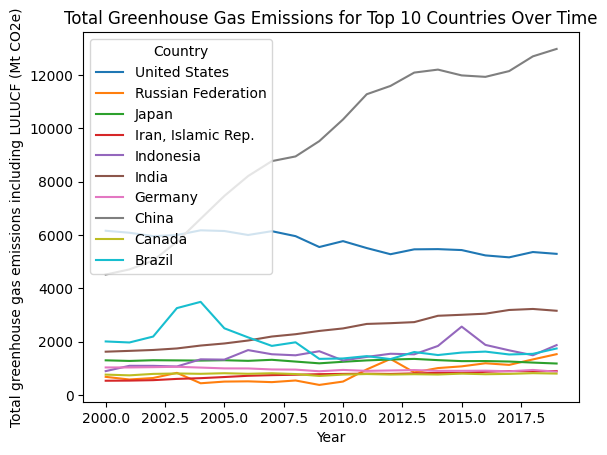

In [ ]:
top10_countries = worldb_df_final.groupby('Country')['Total greenhouse gas emissions including LULUCF (Mt CO2e)'].sum().sort_values(ascending=False).head(10).index.tolist()

top10_ghg_df = worldb_df_final[worldb_df_final['Country'].isin(top10_countries)]

sns.lineplot(data=top10_ghg_df, x='Year', y='Total greenhouse gas emissions including LULUCF (Mt CO2e)', hue='Country')
plt.title('Total Greenhouse Gas Emissions for Top 10 Countries Over Time')
plt.xlabel('Year')
plt.ylabel('Total greenhouse gas emissions including LULUCF (Mt CO2e)')
plt.show()

How has the United States performed with regards to historical World Bank data?

In [ ]:
worldb_df_final[worldb_df_final['Country'] == 'United States'].describe()

,Year,Electricity production from coal sources (% of total),"Electricity production from oil, gas and coal sources (% of total)",Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),Electricity production from oil sources (% of total),Renewable electricity output (% of total electricity output),"Electricity production from renewable sources, excluding hydroelectric (kWh)","Electricity production from renewable sources, excluding hydroelectric (% of total)",...,GDP (current LCU),GDP growth (annual %),"Population, total",Total greenhouse gas emissions including LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon intensity of GDP (kg CO2e per constant 2015 US$ of GDP),Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990),Total greenhouse gas emissions excluding LULUCF (% change from 1990)
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,...,2.000000e+01,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2009.50000,42.647732,68.552911,6.898880,24.214383,19.309319,1.690796,11.784268,2.105738e+11,4.885388,...,1.531563e+13,2.157465,3.073368e+08,5705.318630,6680.433980,21.842412,5465.769965,0.335309,9.670501,7.587646
std,5.91608,8.772778,3.052913,0.534712,6.677908,0.426426,1.032463,3.170420,1.353564e+11,3.059357,...,3.375220e+12,1.447750,1.529716e+07,362.675752,378.513521,2.286044,360.768648,0.057971,7.238812,6.095918
min,2000.00000,24.353038,62.506649,5.555264,15.651175,18.671463,0.756131,7.422489,7.217400e+10,1.867226,...,1.025095e+13,-2.576500,2.821624e+08,5159.888800,6151.772400,18.812730,4959.764900,0.246381,-0.482474,-0.926390
25%,2004.75000,37.245190,67.040714,6.526281,18.068414,19.060471,0.888671,9.213105,9.203725e+10,2.157685,...,1.283370e+13,1.789700,2.948388e+08,5414.371525,6335.299250,19.872432,5129.443925,0.291457,2.922130,2.029289
50%,2009.50000,45.368014,69.481712,6.944803,22.962349,19.217415,1.151349,10.697515,1.657585e+11,3.865205,...,1.490942e+13,2.490721,3.080749e+08,5657.416850,6609.563250,21.375656,5414.841750,0.334695,8.648628,6.446280
75%,2014.25000,50.094521,70.940645,7.152033,29.906120,19.503925,2.695864,13.442673,3.037433e+11,7.007924,...,1.777986e+13,2.833092,3.198970e+08,6019.054575,7038.124875,24.117870,5813.057950,0.381615,16.638824,13.348218
max,2019.00000,52.545595,71.704292,7.921920,37.338675,20.505590,3.356759,17.938274,4.772359e+11,10.866621,...,2.153998e+13,4.077586,3.302262e+08,6173.540700,7203.334400,25.529036,5928.971000,0.432214,18.964616,16.008899


What happened in the year 2010, as many countries started to implement fiscal environmental policy during that time?

In [ ]:
environment_imf_gdp[environment_imf_gdp['Year'] == 2010].describe()

,Year,Environmental Taxes (Percent of GDP),Taxes on Energy (including fuel for transport) (Percent of GDP),Taxes on Pollution (Percent of GDP),Taxes on Resources (Percent of GDP),Taxes on Transport (excluding fuel for transport) (Percent of GDP)
count,88.0,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2010.0,1.644946,1.105175,0.040805,0.071385,0.433945
std,0.0,1.175119,0.905644,0.077358,0.370862,0.450692
min,2010.0,-0.210000,-0.420000,0.000000,0.000000,0.000000
25%,2010.0,0.552500,0.276137,0.000000,0.000000,0.067500
50%,2010.0,1.680000,1.125000,0.000000,0.000000,0.290000
75%,2010.0,2.480000,1.795000,0.042500,0.030000,0.645000
max,2010.0,5.010000,3.360000,0.380000,3.380000,2.190000


Which countries collect the most on environmental tax with regards to their GDP?

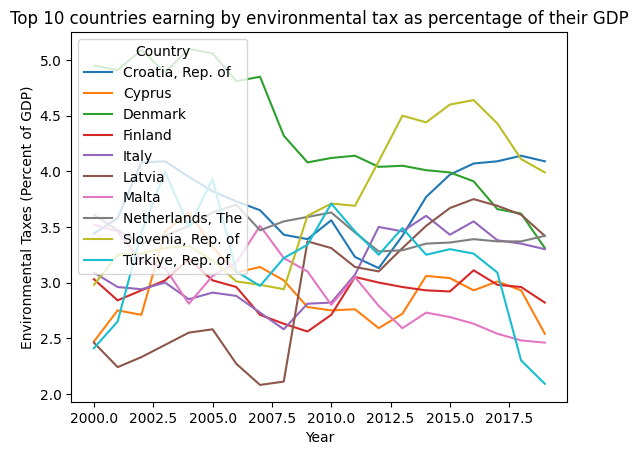

In [ ]:
top10_envtax_countries = environment_imf_gdp.groupby('Country')['Environmental Taxes (Percent of GDP)'].sum().sort_values(ascending=False).head(10).index.tolist()

top10_envtax_df = environment_imf_gdp[environment_imf_gdp['Country'].isin(top10_envtax_countries)]

sns.lineplot(data=top10_envtax_df, x='Year', y='Environmental Taxes (Percent of GDP)', hue='Country')
plt.title('Top 10 countries earning by environmental tax as percentage of their GDP')
plt.xlabel('Year')
plt.ylabel('Environmental Taxes (Percent of GDP)')
plt.show()

How much money is spend from private sources on climate change?

In [ ]:
CPI_Global_Climate_Finance_df[CPI_Global_Climate_Finance_df['Institution_Type_Layer1'] == 'Private'].describe()

,Value
count,1.359000e+03
mean,9.115784e-01
std,5.450970e+00
min,5.680000e-17
25%,8.293280e-04
50%,1.150285e-02
75%,1.424395e-01
max,1.260967e+02


What are interesting starting points when it comes to funds spend on mitigation goals?

In [ ]:
CPI_Global_Climate_Finance_df[CPI_Global_Climate_Finance_df['Use'] == 'Mitigation'].describe()

,Value
count,5.991000e+03
mean,2.939849e-01
std,2.924311e+00
min,6.030000e-17
25%,1.270000e-05
50%,5.000000e-04
75%,1.338792e-02
max,1.260967e+02


Which regions spend the most on climate adaptation?

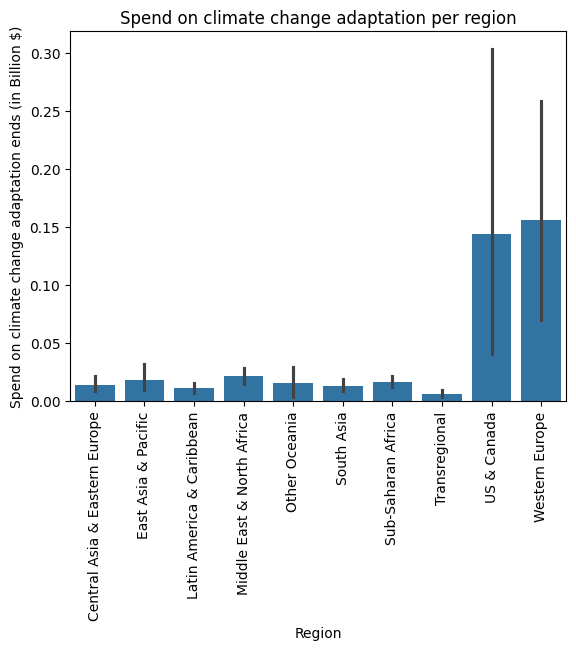

In [ ]:
sns.barplot(data=CPI_Global_Climate_Finance_df[CPI_Global_Climate_Finance_df['Use'] == 'Adaptation'], x='Region_Destination', y='Value')
plt.xticks(rotation=90)
plt.title('Spend on climate change adaptation per region')
plt.xlabel('Region')
plt.ylabel('Spend on climate change adaptation ends (in Billion $)')
plt.show()